In [107]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.visualization import plot_histogram
import itertools

from qiskit_aer import AerSimulator
import numpy as np

simulator = AerSimulator()

In [141]:
# create a simple function that gives us the basis for exploring 
# the whole classical input space, to get classical result
def encode (qc, qubits, bits):
    for i in range(len(qubits)):
        if bits[i] == 1:
            qc.x(qubits[i])


basis = [(5*[0]) for i in range(4)] # init all basis for qubits
for i in range(len(basis)):
    basis[i][i] = 1
basis


[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0]]

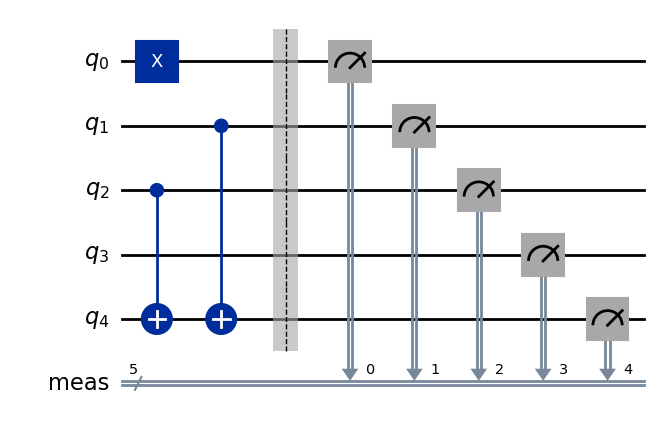

In [109]:
qc = QuantumCircuit(5)
encode(qc, range(5), [1,0,0,0,0])
qc.cx(2, 4)
qc.cx(1, 4)
qc.measure_all()
qc.draw('mpl')

[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0]]

In [111]:
for i,b in enumerate(basis): # for each basis)
    qc = QuantumCircuit(5) # create a circuit, last qubit is the ancilla
    encode(qc, range(5), b)
    qc.cx(2, 4)
    qc.cx(0, 4)
    qc.measure_all()
    transpile(qc, simulator) 
    result = simulator.run(qc).result().get_counts()
    #print(result)
    state = (list(result.keys())[0])
    ancilla = state[0]
    if ancilla == '1':
        print("CNOT on position", i)
    #print(b, state)

CNOT on position 0
CNOT on position 2


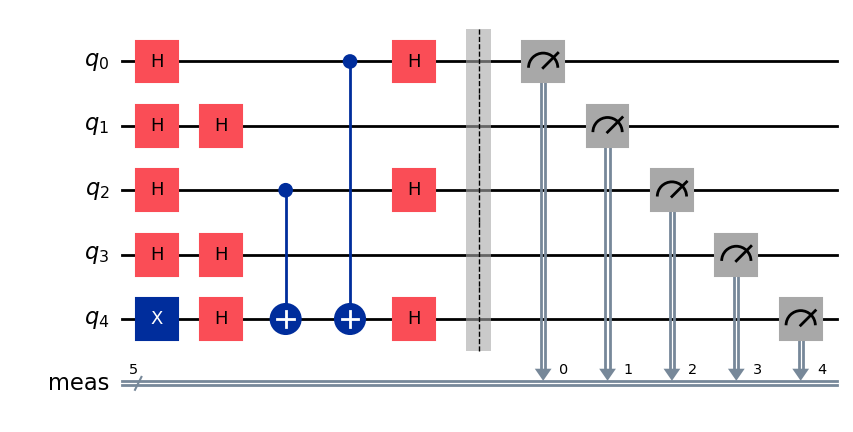

In [119]:
## Quantum superposition approach, 
## the idea is to use | + + + ... - > 
qc = QuantumCircuit(5)
qc.x([4])
qc.h(range(5))
qc.cx(2, 4)
qc.cx(0, 4)
qc.h(range(5))
qc.measure_all()
qc.draw('mpl')
transpile(qc, simulator) 
result = simulator.run(qc).result().get_counts()
qc.draw('mpl')

In [140]:
for i in (np.where(
    np.array([int(i)
              for i in list(result.keys())[0][:-1]]) == 1)[0]):
    print(f"CNOT in postion {i}")

CNOT in postion 0
CNOT in postion 2
